## Voronoi splitter script

Import modules

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from voronoi_splitter import *

### Set input polygon

#### **With list of coordinates as input**

In [2]:
# coordinates = [
#     (481084.7511,	9254639.9827),
#     (480892.7311,	9253708.5498),
#     (480369.7494,	9253843.1087),
#     (480536.2017,	9254658.7499),
#     (480536.2017,	9254658.7499),
#     (480369.7494,	9253843.1087),
#     (479840.5872,	9253947.3874),
#     (480029.5482,	9254881.0150),
#     (480029.5482,	9254881.0150),
#     (479840.5872,	9253947.3874),
#     (479306.6472,	9254046.4516),
#     (479483.9255,	9254896.9338),
#     (479483.9255,	9254896.9338),
#     (479306.6427,	9254046.4516),
#     (478788.1783,	9254184.9157),
#     (478964.7967,	9255065.1213),
#     (478964.7967,	9255065.1213),
#     (478788.1783,	9254184.9157),
#     (478264.2269,	9254314.7229),
#     (478431.6493,	9255135.1176),
#     (478431.6493,	9255135.1176),
#     (478264.2269,	9254314.7229),
#     (477730.2743,	9254424.8583),
#     (477905.5111,	9255254.2095)
# ]

coordinates = [
    (480354.5654, 9253821.1975),
    (480879.5466, 9253686.3376),
    (480709.9375, 9252855.2276),
    (480183.7994, 9252974.3195),
    (479827.2704, 9253924.5214),
    (480354.5654, 9253821.1975),
    (480183.7994, 9252974.3195),
    (479645.2393, 9253030.4658),
    (479827.2704, 9253924.5214),
    (479645.2393, 9253030.4658),
    (479131.5232, 9253212.5033),
    (479301.1323, 9254022.0480),
    (479301.1323, 9254022.0480),
    (479131.5232, 9253212.5033),
    (478605.3851, 9253282.4052),
    (478774.9942, 9254162.7052),
    (478774.9942, 9254162.7052),
    (478605.3851, 9253282.4052),
    (478069.6271, 9253414.2081),
    (478250.5672, 9254292.3471),
    (477722.7179, 9254400.8891),
    (478250.5672, 9254292.3471),
    (478069.6271, 9253414.2081),
    (477552.0354, 9253552.2003),
    (477643.5880, 9254021.8984)
]

polygon_number_db = 1

In [3]:
# poly = polygon_from_coord(coordinates, convex_hull=True)
# poly = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly, crs=32718))
# poly.to_file('output_data/test2.geojson', driver='GeoJSON')
# poly.plot()

<AxesSubplot:>

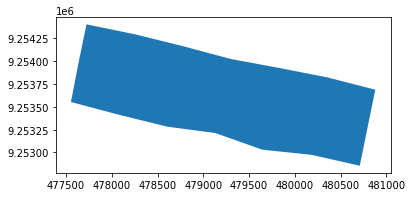

In [5]:
poly = polygon_from_coord(coordinates, mode='concave')
poly = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly, crs=32718))
#poly.to_file('output_data/test3.geojson', driver='GeoJSON')
poly['pol_id'] = polygon_number_db
poly.plot()

### Applies "voronoi_splitter" function and retrieves the result in an object called "result"

The arguments of the function voronoi_splitter are:
- Input polygon as a geopandas object
- Number of sub-polygons for the output (the number of smaller polygons requested as an output)
- CRS (coordinate reference system) of the input
- Number of random points used to build the Voronoi's polygons, the bigger the number the less variance in the areas of the resulting polygons (but also a big number of point can make the function slow, and eventually break the procces)
- The seed is just for make reproductible the random point generation, does't matter in this case and is set by default to 1

In [6]:
# define mean wanted area for the subpolygons
subpoly_area = 10000

print('Polygon area: {} sq. mt'.format(round(poly.area.values[0])))

n_subpolygons = round(poly.area.values[0]/subpoly_area)
n_subpolygons

Polygon area: 2833575 sq. mt


283

In [7]:
import time

In [8]:
start = time.time()

result = voronoi_splitter(poly, 283, crs='EPSG:32718', npoints=350000, seed=1, offset_id=635)
result['nft_id'] = nft_id(result, 'pol_id', 'subpol_id')

result.head(3)

print(time.time()-start)

A total of 283 polygons where created.
Areas range from 3718 to 19679 square meters
The mean area is 10013 square meters
3.3221640586853027


<AxesSubplot:>

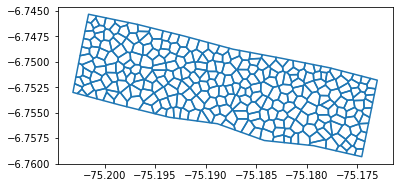

In [9]:
result.boundary.plot()

In [10]:
result.head()

pol_id                                           geometry  subpol_id  \
0       1  POLYGON ((-75.17399 -6.75255, -75.17405 -6.752...        636   
1       1  POLYGON ((-75.17405 -6.75222, -75.17470 -6.752...        637   
2       1  POLYGON ((-75.18239 -6.75051, -75.18307 -6.749...        638   
3       1  POLYGON ((-75.17870 -6.75090, -75.17917 -6.750...        639   
4       1  POLYGON ((-75.20088 -6.74569, -75.20134 -6.746...        640   

     area  centroid_x  centroid_y     nft_id  
0  9228.9  -75.173527   -6.752153  #001-0636  
1  6410.7  -75.174243   -6.751804  #001-0637  
2  7790.1  -75.182468   -6.749945  #001-0638  
3  4699.4  -75.178970   -6.750615  #001-0639  
4  6181.2  -75.201328   -6.745724  #001-0640

### Saves to JSON

The arguments of the function are:
- Output path for the JSON file
- Geopandas object which should be the output of the voronoi_splitter function
- The fields to include in the JSON file

In [11]:
result_columns =  ['nft_id', 'pol_id', 'subpol_id', 'area', 'coordinates', 'centroid']
json_writer('output_data/voronois_pol_b.json', result, result_columns)

JSON file was writen in output_data/voronois_pol_b.json


### Saves to GeoJSON (can be loaded in any desktop GIS, like QGIS)

In [12]:
result.to_file('output_data/voronois_pol_b.geojson', driver='GeoJSON')

### Plot histogram of areas

(array([ 3.,  1.,  4.,  3.,  6., 15., 14., 11., 20., 19., 17., 15., 32.,
        15., 22., 18., 20., 12.,  7.,  5.,  3.,  7.,  6.,  5.,  0.,  0.,
         0.,  1.,  1.,  1.]),
 array([ 4854.7 ,  5269.09,  5683.48,  6097.87,  6512.26,  6926.65,
         7341.04,  7755.43,  8169.82,  8584.21,  8998.6 ,  9412.99,
         9827.38, 10241.77, 10656.16, 11070.55, 11484.94, 11899.33,
        12313.72, 12728.11, 13142.5 , 13556.89, 13971.28, 14385.67,
        14800.06, 15214.45, 15628.84, 16043.23, 16457.62, 16872.01,
        17286.4 ]),
 <BarContainer object of 30 artists>)

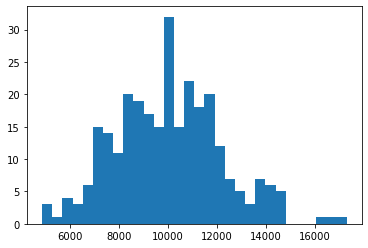

In [13]:
area = result['area']
fig, axs = plt.subplots(1)
axs.hist(area, bins=30)

In [18]:
min(area) * 0.25

812.1

In [2]:
# merge both GeoJSONs
polA = gpd.read_file('output_data/voronois_pol_a.geojson')
polB = gpd.read_file('output_data/voronois_pol_b.geojson')

(array([ 2.,  0.,  0.,  1.,  0.,  1.,  4.,  3.,  8.,  5., 11., 13., 24.,
        21., 21., 27., 24., 27., 21., 25., 12.,  8.,  5.,  7.,  2.,  4.,
         4.,  1.,  1.,  1.]),
 array([ 7535.4       ,  7690.26333333,  7845.12666667,  7999.99      ,
         8154.85333333,  8309.71666667,  8464.58      ,  8619.44333333,
         8774.30666667,  8929.17      ,  9084.03333333,  9238.89666667,
         9393.76      ,  9548.62333333,  9703.48666667,  9858.35      ,
        10013.21333333, 10168.07666667, 10322.94      , 10477.80333333,
        10632.66666667, 10787.53      , 10942.39333333, 11097.25666667,
        11252.12      , 11406.98333333, 11561.84666667, 11716.71      ,
        11871.57333333, 12026.43666667, 12181.3       ]),
 <BarContainer object of 30 artists>)

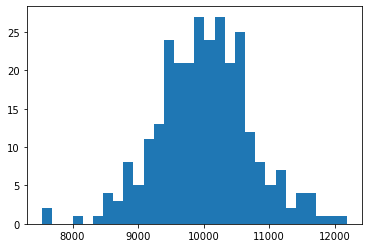

In [4]:
fig, axs = plt.subplots(1)
axs.hist(polB['area'], bins=30)

In [4]:
polygons =  gpd.GeoDataFrame(pd.concat([polA, polB], ignore_index=True))

In [5]:
polygons.to_file('output_data/voronois_polygons.geojson', driver='GeoJSON')

In [6]:
result_columns =  ['nft_id', 'pol_id', 'subpol_id', 'area', 'coordinates', 'centroid']
json_writer('output_data/voronois_polygons.json', polygons, result_columns)

JSON file was writen in output_data/voronois_polygons.json


In [8]:
polygons.to_excel('output_data/voronois_polygons.xlsx', index=False)